# Программирование для всех <br>(основы работы с Python)

*Алла Тамбовцева*

## Практикум 6. Парсинг HTML с BeautifulSoup: поиск по тэгам и атрибутам

Мы уже немного познакомились со структурой html-страниц, теперь попробуем выгрузить информацию из более интересной страницы, а точнее, с сайта [nplus1.ru](https://nplus1.ru/). Наша задача – выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в файл Excel.

Для работы нам снова понадобится модуль `requests` для отправки запросов, для «подключения» к странице и получения ее содержимого в виде строки, и функция `BeautifulSoup` из библиотеки `bs4` для удобного поиска по полученной строке:

In [1]:
import requests
from bs4 import BeautifulSoup

Сохраним ссылку на главную страницу в переменную `main` и отправим запрос к ней с помощью функции `get()` из `requests`:

In [2]:
main = "https://nplus1.ru/"
page = requests.get(main)

Заберём исходный код страницы и преобразуем строку с ним в объект `BeautifulSoup`:

In [3]:
soup = BeautifulSoup(page.text)

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Найдем кусочки кода HTML, соответствующие всем ссылкам на главной странице сайта:

In [4]:
links_raw = soup.find_all("a") 
links_raw[10:20]  # несколько штук для примера

[<a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=880">Астрономия</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=768">Генетика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=890">Математика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=871">Космонавтика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=876">Археология</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=775">Нейронауки</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=767">На мышах</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=771">Звук</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search

Каждый элемент возвращаемого списка имеет тип `BeautifulSoup` и структуру, очень похожую на словарь. Например, ссылка `<a class="hover:underline transition-colors duration-75" href="/search/empty/768">Генетика</a>` изнутри выглядит как словарь следующего вида:

    {'href' : '/search/empty/768', 
     'class' : 'hover:underline transition-colors duration-75'}.
    
Как мы помним, значение по ключу из словаря можно вызвать с помощью метода `.get()`. Давайте извлечем значения по ключу `href` из каждого элемента списка `links`:

In [5]:
links = [li.get("href") for li in links_raw]
links[10:20]  # несколько штук для примера

['https://nplus1.ru/search?tags=880',
 'https://nplus1.ru/search?tags=768',
 'https://nplus1.ru/search?tags=890',
 'https://nplus1.ru/search?tags=871',
 'https://nplus1.ru/search?tags=876',
 'https://nplus1.ru/search?tags=775',
 'https://nplus1.ru/search?tags=767',
 'https://nplus1.ru/search?tags=771',
 'https://nplus1.ru/search?tags=772',
 'https://nplus1.ru/search?tags=778']

Ссылок в списке выше много. Но нам нужны только новости – ссылки, которые начинаются с `https://nplus1.ru/news`. Создадим пустой список `news` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [6]:
news = []
for li in links:
    if "https://nplus1.ru/news/" in li:
        news.append(li)

In [7]:
print(news[0:10])

['https://nplus1.ru/news/2024/10/17/massalia-asteroids', 'https://nplus1.ru/news/2024/10/18/ilc2-chitinase-circuit', 'https://nplus1.ru/news/2024/10/18/limx-dynamics-tron-1', 'https://nplus1.ru/news/2024/10/18/chemical-wave-systems', 'https://nplus1.ru/news/2024/10/18/dark-is-the-night', 'https://nplus1.ru/news/2024/10/18/another-triphallia', 'https://nplus1.ru/news/2024/10/18/co2-diversity-loss', 'https://nplus1.ru/news/2024/10/18/just-get-prescription', 'https://nplus1.ru/news/2024/10/18/thylacinus-head', 'https://nplus1.ru/news/2024/10/17/yandeks-dostavka-m4']


Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `news` в цикле. Посмотрим на новость с индексом 0, у вас может быть другая, новости обновляются.

In [8]:
link0 = news[0]
print(link0)

https://nplus1.ru/news/2024/10/17/massalia-asteroids


### Задача 1

Отправьте запрос к странице по ссылке `link0` с одной новостью, получите результат в виде объекта `BeautifulSoup` и сохраните его как `soup0`.

In [9]:
page0 = requests.get(link0)
soup0 = BeautifulSoup(page0.text)

### Задача 2

Найдите заголовок новости и сохраните его в переменную `title`.

In [10]:
# заменяем неразрывный пробел \xa0 на обычный
title = soup0.find("title").text.replace("\xa0", " ")
print(title)

Три крупных распада астероидов стали источником большинства современных земных метеоритов. Они родом из семейств Массалии и Корониды


### Задача 3

Найдите имя автора новости и дату её публикации. Сохраните их в `author` и `date` соответственно.

In [11]:
# в словаре пишем уточнение – пару атрибут-его значение
date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
author = soup0.find("meta", {"name" : "author"}).get("content")
print(date, author)

2024-10-17 Александр Войтюк


### Задача 4

Найдите сложность новости и рубрики, к которым она относится. Сохраните сложность в переменную `diffc`. Рубрики сначала можно сохранить в список, а затем его элементы объединить в одну строку `rubs`.

**Подсказка:** чтобы упростить себе жизнь, найдите сначала раздел (`div`), в котором на странице хранится дата и время публикации, сложность и рубрики, а затем выполняйте поиск в рамках этого раздела.

In [12]:
# находим раздел div с нужным классом

div = soup0.find("div", {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})

# находим все фрагменты с тэгом <span> внутри div
# spans – список объектоd типа BeautifulSoup

spans = div.find_all("span")

# в span c индексом 3 хранится сложность
# рубрик глобально может быть несколько,
# выбираем все с 4 до конца списка

diffc = spans[3].text
rubs_raw = spans[4:]

# извлекаем текст и склеиваем в одну строку
rubs = ", ".join([r.text for r in rubs_raw])

print(diffc, rubs)

4.9 Астрономия


### Задача 5

Соберите из абзацев текст новости и сохраните его в переменную `text`. Избавьтесь от постронних символов (`\xa0`, `\n`) в тексте. 

In [13]:
# ищем абзацы с текстом
# берем все с тэгом <p> и mb-6 в class,
# первый элемент – подзаголовок, формально еще не новость,
# поэтому берем элементы со второго [1:]
# склеиваем в единую строку
# внимание на последние фразы текста

pars = soup0.find_all("p", {"class" : "mb-6"})[1:]
text = " ".join([p.text for p in pars])
text = text.replace("\xa0", " ").replace("\n", " ")
print(text)

Планетологи определили основные источники метеоритов типа L- и H-хондритов, которые составляют основную часть земных метеоритов. Они возникли из-за трех событий распада крупных астероидов Главного пояса, которые могли входить в семейства Массалии и Корониды. Статьи (1, 2) опубликованы в журнале Nature.  Предполагается, что многие найденные на Земле метеориты родом из Главного пояса астероидов, расположенного между Марсом и Юпитером, и представляют собой обломки или фрагменты столкнувшихся в прошлом астероидов. С течением времени из-за эволюции орбит за счет резонансов и возмущений планетами они могут оказаться на орбите, пересекающей орбиту Земли. Но сопоставить типы астероидов с типами метеоритов, чтобы выяснить происхождение последних, весьма сложно. Около семидесяти процентов всех найденных метеоритов классифицируются как H- и L-хондриты, еще восемь процентов приходится на LL-хондриты и шесть процентов — на метеориты группы HED (говардиты, эвкриты и диогениты). Лишь шесть процентов 

**Дополнительно.** На странице новости есть начало другой (обычно предыдущей) новости, сейчас так устроено большинство новостных сайтов. Как избавиться от лишнего текста? Заметим, что после окончания текущей новости следует подзаголовок следующей (у заголовков нет тэга `<p>`, поэтому в перечне абзацев выше их нет) и её фрагмент. Поэтому для универсального удаления лишнего текста нужно забрать все элементы из `pars` до подзаголовка.

In [14]:
# заберем все значения атрибута class -> classes
# сейчас в classes списки с элементами внутри class
# для каждого элемента в pars

classes = [p.get("class") for p in pars]
print(classes)

[['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['text-36', 'md:text-44', 'xl:text-54', 'font-spectral', 'text-main-gray', 'mb-6'], ['mb-6']]


In [15]:
# переберем все элементы и найдем индекс того, где 
# есть text-main-gray – такое есть только у подзаголовков

for c in classes:
    if "text-main-gray" in c:
        i = classes.index(c)
        break
        
print(i)

10


In [16]:
# заберем все элементы до i
# теперь это абзацы только первой новости

pars_upd = pars[:i]
text = " ".join([p.text for p in pars_upd])
text = text.replace("\xa0", " ").replace("\n", " ")

### Задача 6

Напишите функцию `get_news()`, которая принимает на вход ссылку на страницу с одной новостью, а возвращает список из следующих характеристик: имя автора, дата публикации, сложность новости, рубрики, текст новости.

In [17]:
def get_news(link0):
    """
    Parameters:
        link0 – url for one piece of news (string)
    Returns:
        list of the following features:
            * new's title (string)
            * new's date (string)
            * new's author (string)
            * new's difficulty (string)
            * new's rubrics (string)
            * new's text (string)
    """
    page0 = requests.get(link0)
    soup0 = BeautifulSoup(page0.text)
    
    title = soup0.find("title").text.replace("\xa0", " ")
    date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
    author = soup0.find("meta", {"name" : "author"}).get("content")
    div = soup0.find("div", {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})
    spans = div.find_all("span")
    diffc = spans[3].text
    rubs_raw = spans[4:]
    rubs = ", ".join([r.text for r in rubs_raw])
    
    # для текста – более универсальный вариант без лишней новости
    pars = soup0.find_all("p", {"class" : "mb-6"})[1:]
    classes = [p.get("class") for p in pars]
    for c in classes:
        if "text-main-gray" in c:
            i = classes.index(c)
    pars_upd = pars[:i]
    text = " ".join([p.text for p in pars_upd])
    text = text.replace("\xa0", " ").replace("\n", " ")
    
    return [title, author, date, diffc, rubs, text]

Отлично! Теперь осталось применить функцию ко всем ссылкам в списке `news`. Чтобы сайт не понял, что мы его автоматически грабим, будем выгружать новости постепенно – с задержкой в 1.2 секунды. Импортируем для этого функцию `sleep` :

In [18]:
from time import sleep

Теперь будем применять функцию в цикле к каждой ссылке в `news`, только с одним дополнением – добавленной конструкцией `try-except`, которая позволит продолжать исполнение цикла, если при применении функции Python столкнулся с ошибкой любого вида:

In [19]:
info = []
for n in news:
    # пробуй исполнить следующий код
    try:
        res = get_news(n)
        info.append(res)
        print(n)
    # если он вызвал ошибку любого вида, печатай сообщение и иди дальше
    except:
        print("Something went wrong")
        print(n)
    sleep(1.2)

https://nplus1.ru/news/2024/10/17/massalia-asteroids
https://nplus1.ru/news/2024/10/18/ilc2-chitinase-circuit
https://nplus1.ru/news/2024/10/18/limx-dynamics-tron-1
https://nplus1.ru/news/2024/10/18/chemical-wave-systems
https://nplus1.ru/news/2024/10/18/dark-is-the-night
https://nplus1.ru/news/2024/10/18/another-triphallia
https://nplus1.ru/news/2024/10/18/co2-diversity-loss
https://nplus1.ru/news/2024/10/18/just-get-prescription
https://nplus1.ru/news/2024/10/18/thylacinus-head
https://nplus1.ru/news/2024/10/17/yandeks-dostavka-m4
https://nplus1.ru/news/2024/10/17/mars-life-or-no
https://nplus1.ru/news/2024/10/17/kidney-transplantation-hiv
https://nplus1.ru/news/2024/10/17/metformin-okspring
https://nplus1.ru/news/2024/10/17/threat-and-safety
https://nplus1.ru/news/2024/10/17/drought-migration
https://nplus1.ru/news/2024/10/17/zamenis-longissimus-great-britain
https://nplus1.ru/news/2024/10/17/is-marburg-curable
https://nplus1.ru/news/2024/10/17/melatonin-in-your-bones
https://nplus1

Финальный штрих – импортируем `pandas` и преобразуемый полученный список кортежей в датафрейм:

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(info)
df.head()

,0,1,2,3,4,5
0,Три крупных распада астероидов стали источнико...,Александр Войтюк,2024-10-17,4.9,Астрономия,Планетологи определили основные источники мете...
1,Хитин в легких нарушил регенерацию эпителиальн...,Слава Гоменюк,2024-10-18,4.2,"Медицина, Биология","Американские ученые выяснили, что у мышей с по..."
2,LimX Dynamics сделала двуногого робота с быстр...,Андрей Фокин,2024-10-18,1.4,Роботы и дроны,Китайская робототехническая компания LimX Dyna...
3,Мозаику Вороного увидели в распространении хим...,Егор Конюхов,2024-10-18,2.3,"Физика, Химия",Физики провели диффузионно-осадочную химическу...
4,Свет ночью и мрак днем связали с ростом риска ...,Олег Лищук,2024-10-18,1.9,"Медицина, Экология и климат","Австралийские, американские и британские иссле..."


Не везде информация сгрузилась корректно, есть проблемы унификации, можно потом поправить это, написав функцию и применив ее через `.apply()` к соответствующим столбцам.

А пока добавим содержательные названия столбцов и выгрузим датафрейм в файл:

In [22]:
df.columns = ["title", "author", "date", "diffc", "rubrics", "text"]
df.to_excel("nplus1.xlsx")

### Задача 7

Постройте гистограмму для сложности новости.

In [23]:
# проверим типы столбцов
# тип сложности пока object, текстовый

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    49 non-null     object
 1   author   49 non-null     object
 2   date     49 non-null     object
 3   diffc    49 non-null     object
 4   rubrics  49 non-null     object
 5   text     49 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [24]:
# преобразуем тип в float

df["diffc"] = df["diffc"].astype(float)

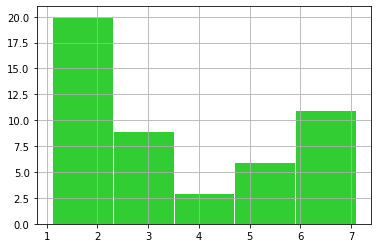

In [25]:
# теперь можно строить гистограмму
# bins = 5, пять столбцов

df["diffc"].hist(color = "limegreen", edgecolor = "white", bins = 5);

### Задача 8

Отсортируйте строки в датафрейме в порядке убывания сложности и сохраните изменения в датафрейме.

In [26]:
# обычная сортировка – по возрастанию

df.sort_values("diffc")

,title,author,date,diffc,rubrics,text
27,Apple отказалась от лицензии на испытания бесп...,Андрей Фокин,2024-10-15,1.1,Транспорт,Департамент транспортных средств Калифорнии от...
9,Беспилотный грузовик Яндекса впервые доставил ...,Андрей Фокин,2024-10-17,1.1,Транспорт,Беспилотный грузовик компании Яндекс успешно в...
7,Назначение агонистов ГПП-1 связали со снижение...,Олег Лищук,2024-10-18,1.3,"Медицина, Психология",Фарес Кедан (Fares Qeadan) с коллегами по Унив...
2,LimX Dynamics сделала двуногого робота с быстр...,Андрей Фокин,2024-10-18,1.4,Роботы и дроны,Китайская робототехническая компания LimX Dyna...
16,Первые в мире испытания терапии лихорадки Марб...,Олег Лищук,2024-10-17,1.4,Медицина,В Руанде начались первые в мире клинические ис...
18,Польская робособака прогулялась под водой. Это...,Андрей Фокин,2024-10-17,1.7,Роботы и дроны,Польская компания MAB Robotics опубликовала ви...
28,Капуцины поймали и съели домашнюю курицу. Ране...,Катерина Петрова,2024-10-15,1.8,Зоология,Зоологи из Бразилии описали случай охоты полуд...
24,Межпланетная станция Hera прислала первые сним...,Александр Войтюк,2024-10-16,1.9,Космонавтика,10 и 11 октября 2024 года европейская станция ...
29,Ученые вывели устойчивые к волнам жары кораллы...,Марина Попова,2024-10-15,1.9,Экология и климат,С помощью эксперимента по селективному скрещив...
4,Свет ночью и мрак днем связали с ростом риска ...,Олег Лищук,2024-10-18,1.9,"Медицина, Экология и климат","Австралийские, американские и британские иссле..."


In [27]:
# меняем на убывание, выключаем возрастание

df.sort_values("diffc", ascending = False)

,title,author,date,diffc,rubrics,text
40,Магноны возбудили с помощью переменного тока. ...,Егор Конюхов,2024-10-01,7.1,Физика,Физики индуцировали магноны с помощью переменн...
44,Яркий сжатый вакуум сгенерировал высокие гармо...,Дмитрий Рудик,2024-10-14,6.7,Физика,Физики сгенерировали высокие гармоники в магни...
41,Капли жидкости локализовались подобно электрон...,Дмитрий Рудик,2024-10-02,6.7,Физика,"Физики из США и Великобритании показали, что к..."
39,Карбоновые кислоты вступили в фотохимические р...,Михаил Бойм,2024-10-01,6.7,Химия,Химики из США научились вводить карбоновые кис...
34,Яркий сжатый вакуум сгенерировал высокие гармо...,Дмитрий Рудик,2024-10-14,6.7,Физика,Физики сгенерировали высокие гармоники в магни...
48,Мутации рецептора к мелатонину назвали причино...,Олег Лищук,2024-10-17,6.1,"Биология, Медицина",Американские исследователи провели полноэкзомн...
17,Мутации рецептора к мелатонину назвали причино...,Олег Лищук,2024-10-17,6.1,"Биология, Медицина",Американские исследователи провели полноэкзомн...
47,Макроскопическая квантовая система коллапсиров...,Егор Конюхов,2024-10-16,6.1,Физика,Физики попытались определить масштабируемость ...
19,Макроскопическая квантовая система коллапсиров...,Егор Конюхов,2024-10-16,6.1,Физика,Физики попытались определить масштабируемость ...
45,Квантовый дарвинизм подтвердили с помощью моде...,Егор Конюхов,2024-10-14,5.9,Физика,Физики смоделировали распространение квантовой...


In [28]:
# для сохранения изменений можем перезаписать 
# через df = df.sort_values("diffc", ascending = False)
# а можем добавить inplace = True

df.sort_values("diffc", ascending = False, inplace = True)

**Дополнительно.** В случае сортировки по текстовому столбцу, она производится по алфавиту:

In [29]:
df.sort_values("author")

,title,author,date,diffc,rubrics,text
24,Межпланетная станция Hera прислала первые сним...,Александр Войтюк,2024-10-16,1.9,Космонавтика,10 и 11 октября 2024 года европейская станция ...
32,Станция Europa Clipper отправилась в космос. О...,Александр Войтюк,2024-10-14,3.1,Космонавтика,Ракета-носитель Falcon Heavy успешно стартовал...
10,Планетологи разрешили микробам жить в снегу у ...,Александр Войтюк,2024-10-17,4.5,Астрономия,Планетологи при помощи моделирования определил...
0,Три крупных распада астероидов стали источнико...,Александр Войтюк,2024-10-17,4.9,Астрономия,Планетологи определили основные источники мете...
38,"Астрономы составили портрет вспыхнувшей 2,5 ми...",Александр Войтюк,2024-09-29,5.1,Астрономия,Астрономы определили возможные местоположения ...
42,Планетологи заподозрили родство мест рождения ...,Александр Войтюк,2024-10-05,5.1,Астрономия,Планетологи вновь подтвердили родство хондритн...
27,Apple отказалась от лицензии на испытания бесп...,Андрей Фокин,2024-10-15,1.1,Транспорт,Департамент транспортных средств Калифорнии от...
2,LimX Dynamics сделала двуногого робота с быстр...,Андрей Фокин,2024-10-18,1.4,Роботы и дроны,Китайская робототехническая компания LimX Dyna...
18,Польская робособака прогулялась под водой. Это...,Андрей Фокин,2024-10-17,1.7,Роботы и дроны,Польская компания MAB Robotics опубликовала ви...
9,Беспилотный грузовик Яндекса впервые доставил ...,Андрей Фокин,2024-10-17,1.1,Транспорт,Беспилотный грузовик компании Яндекс успешно в...


Если нужна сортировка сразу по нескольким основаниям, названия столбцов-оснований для сортировки указываются в виде списка:

In [30]:
# сортировка по автору, а если автор одинаковый, 
# внутри каждого автора дополнительная сортировка по сложности

df.sort_values(["author", "diffc"])

,title,author,date,diffc,rubrics,text
24,Межпланетная станция Hera прислала первые сним...,Александр Войтюк,2024-10-16,1.9,Космонавтика,10 и 11 октября 2024 года европейская станция ...
32,Станция Europa Clipper отправилась в космос. О...,Александр Войтюк,2024-10-14,3.1,Космонавтика,Ракета-носитель Falcon Heavy успешно стартовал...
10,Планетологи разрешили микробам жить в снегу у ...,Александр Войтюк,2024-10-17,4.5,Астрономия,Планетологи при помощи моделирования определил...
0,Три крупных распада астероидов стали источнико...,Александр Войтюк,2024-10-17,4.9,Астрономия,Планетологи определили основные источники мете...
42,Планетологи заподозрили родство мест рождения ...,Александр Войтюк,2024-10-05,5.1,Астрономия,Планетологи вновь подтвердили родство хондритн...
38,"Астрономы составили портрет вспыхнувшей 2,5 ми...",Александр Войтюк,2024-09-29,5.1,Астрономия,Астрономы определили возможные местоположения ...
9,Беспилотный грузовик Яндекса впервые доставил ...,Андрей Фокин,2024-10-17,1.1,Транспорт,Беспилотный грузовик компании Яндекс успешно в...
27,Apple отказалась от лицензии на испытания бесп...,Андрей Фокин,2024-10-15,1.1,Транспорт,Департамент транспортных средств Калифорнии от...
2,LimX Dynamics сделала двуногого робота с быстр...,Андрей Фокин,2024-10-18,1.4,Роботы и дроны,Китайская робототехническая компания LimX Dyna...
18,Польская робособака прогулялась под водой. Это...,Андрей Фокин,2024-10-17,1.7,Роботы и дроны,Польская компания MAB Robotics опубликовала ви...


In [31]:
# по автору сортируем в порядке возрастания,
# по сложности – в порядке убывания

df.sort_values(["author", "diffc"], ascending = [True, False])

,title,author,date,diffc,rubrics,text
42,Планетологи заподозрили родство мест рождения ...,Александр Войтюк,2024-10-05,5.1,Астрономия,Планетологи вновь подтвердили родство хондритн...
38,"Астрономы составили портрет вспыхнувшей 2,5 ми...",Александр Войтюк,2024-09-29,5.1,Астрономия,Астрономы определили возможные местоположения ...
0,Три крупных распада астероидов стали источнико...,Александр Войтюк,2024-10-17,4.9,Астрономия,Планетологи определили основные источники мете...
10,Планетологи разрешили микробам жить в снегу у ...,Александр Войтюк,2024-10-17,4.5,Астрономия,Планетологи при помощи моделирования определил...
32,Станция Europa Clipper отправилась в космос. О...,Александр Войтюк,2024-10-14,3.1,Космонавтика,Ракета-носитель Falcon Heavy успешно стартовал...
24,Межпланетная станция Hera прислала первые сним...,Александр Войтюк,2024-10-16,1.9,Космонавтика,10 и 11 октября 2024 года европейская станция ...
18,Польская робособака прогулялась под водой. Это...,Андрей Фокин,2024-10-17,1.7,Роботы и дроны,Польская компания MAB Robotics опубликовала ви...
2,LimX Dynamics сделала двуногого робота с быстр...,Андрей Фокин,2024-10-18,1.4,Роботы и дроны,Китайская робототехническая компания LimX Dyna...
9,Беспилотный грузовик Яндекса впервые доставил ...,Андрей Фокин,2024-10-17,1.1,Транспорт,Беспилотный грузовик компании Яндекс успешно в...
27,Apple отказалась от лицензии на испытания бесп...,Андрей Фокин,2024-10-15,1.1,Транспорт,Департамент транспортных средств Калифорнии от...


**Еще дополнительно.** Из-за наличия одинаковых ссылок некоторые новости выгрузились два раза (по-хорошему это надо было поправить в самом начале на этапе создания списка `news`, чтобы не тратить время на выгрузку одного и того же, но уже поздно). Чтобы убрать дубликаты из датафрейма, можно воспользоваться методом `drop_duplicates()`:

In [32]:
df.drop_duplicates(inplace = True)

# было 49, стало 44
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 40 to 27
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44 non-null     object 
 1   author   44 non-null     object 
 2   date     44 non-null     object 
 3   diffc    44 non-null     float64
 4   rubrics  44 non-null     object 
 5   text     44 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.4+ KB
